In [ ]:
#%%

import jax

import jax.numpy as jnp
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [ ]:
#%%

## Load the data (.npz files in the results folder)

savefolder = "results_sgd_5/"
nb_runs = 51

Ts = []
losses = []
walltimes = []
grad_norms = []
Ts_list = []
for i in range(nb_runs):
    data = np.load(f"{savefolder}{i:05d}.npz")

    Ts.append(data['time_horizon_init'])
    losses.append(data['losses'])
    walltimes.append(data['wall_time'])
    grad_norms.append(data['grad_norms'])
    Ts_list.append(data['time_horizon_list'])

epochs = np.arange(losses[0].shape[0]+1)
losses = jnp.stack(losses)
Ts = np.array(Ts)
walltimes = np.array(walltimes)
grad_norms = np.stack(grad_norms)
Ts_list = np.stack(Ts_list)

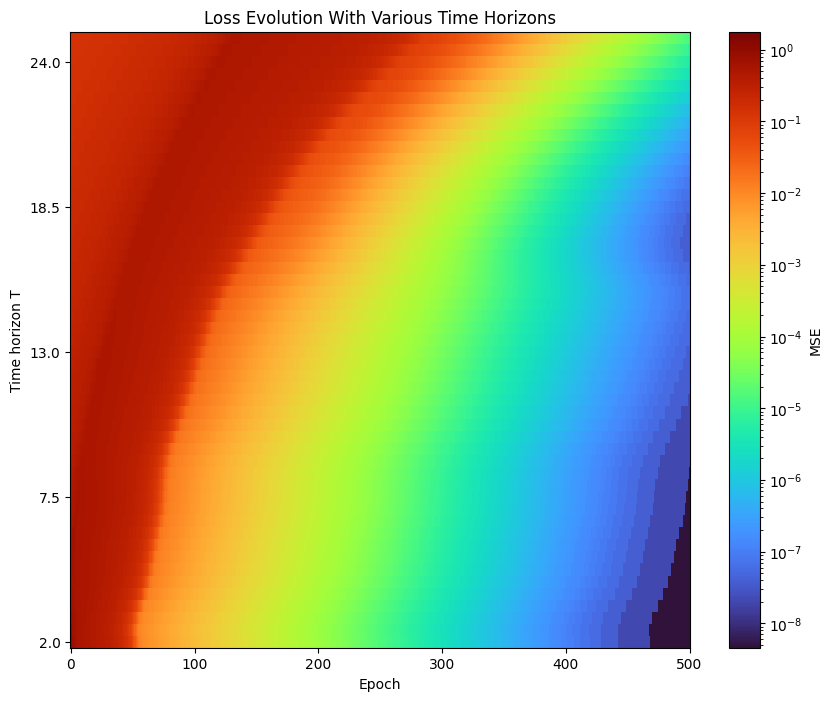

In [ ]:
#%%

## 2D imshow plot with the loss againts the epochs and time horizon T

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
losses_plot = losses[:,:501]
pcm = ax.imshow(losses_plot, aspect='auto', cmap='turbo', interpolation='none', origin='lower', norm=mcolors.LogNorm(vmin=losses_plot.min(), vmax=losses_plot.max()))

## Add colorbar
cbar = fig.colorbar(pcm, ax=ax, label='MSE')

ax.set_xlabel('Epoch')
ax.set_ylabel('Time horizon T')
ax.set_title('Loss Evolution With Various Time Horizons')

## Set x ticks and labels to the epochs
# ax.set_xticks(np.arange(0, losses[0].shape[0]+1, 500))
# ax.set_xticklabels(epochs[::500])

## Set y ticks and labels to the time horizon
Ts_ticks = np.linspace(Ts.min(), Ts.max(), 5)
ax.set_yticks(np.arange(len(Ts))[::len(Ts)//4])
ax.set_yticklabels(Ts_ticks)

plt.savefig(f"{savefolder}loss_imshow.png", dpi=300, bbox_inches='tight')

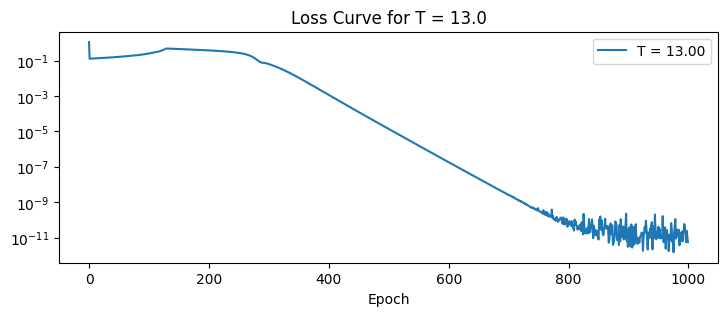

In [ ]:
# %%

## 1D plot of one loss curve for a specific time horizon T
plot_id = nb_runs//2

fig, ax = plt.subplots(1, 1, figsize=(8.5, 3))
ax.plot(losses[50], label=f'T = {Ts[plot_id]:.2f}')
ax.set_xlabel('Epoch')
# ax.set_ylabel('MSE')
ax.set_yscale('log')
ax.set_title(f'Loss Curve for T = {Ts[plot_id]:.1f}')

plt.legend()
plt.savefig(f"{savefolder}loss_curve_{Ts[plot_id]}.png", dpi=300, bbox_inches='tight')

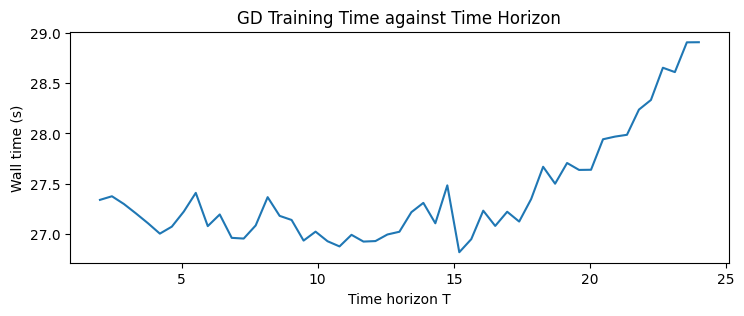

In [ ]:
#%%

## 1D plot of the wall time against the time horizon T

fig, ax = plt.subplots(1, 1, figsize=(8.5, 3))
ax.plot(Ts, walltimes)

ax.set_xlabel('Time horizon T')
ax.set_ylabel('Wall time (s)')
ax.set_title('GD Training Time against Time Horizon')

plt.savefig(f"{savefolder}walltimes.png", dpi=300, bbox_inches='tight')

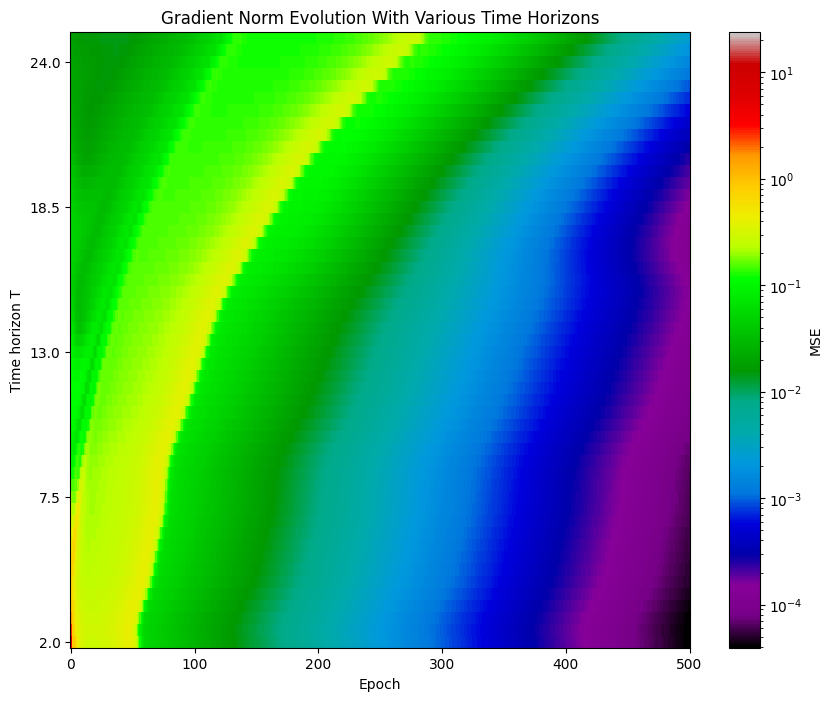

In [ ]:
#%%

## 2D imshow plot with the loss gradient norm the epochs and time horizon T

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
grad_norm_plot = grad_norms[:,:501]

pcm = ax.imshow(grad_norm_plot, aspect='auto', cmap='nipy_spectral', interpolation='none', origin='lower', norm=mcolors.LogNorm(vmin=grad_norm_plot.min(), vmax=grad_norm_plot.max()))

## Add colorbar
cbar = fig.colorbar(pcm, ax=ax, label='MSE')

ax.set_xlabel('Epoch')
ax.set_ylabel('Time horizon T')
ax.set_title('Gradient Norm Evolution With Various Time Horizons')

## Set y ticks and labels to the time horizon
Ts_ticks = np.linspace(Ts.min(), Ts.max(), 5)
ax.set_yticks(np.arange(len(Ts))[::len(Ts)//4])
ax.set_yticklabels(Ts_ticks)

plt.savefig(f"{savefolder}loss_imshow_grads.png", dpi=300, bbox_inches='tight')

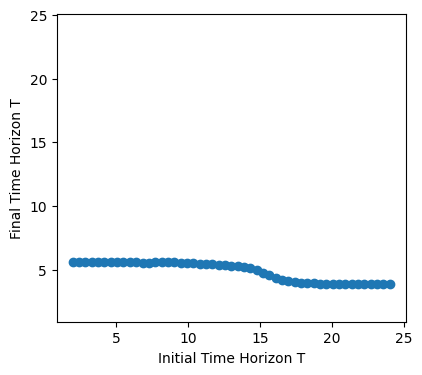

In [ ]:
#%%

## Plot the final Ts against the init Ts

fig, ax = plt.subplots(1, 1, figsize=(4.5, 4))

initTs = Ts
finalTs = Ts_list[:,-1]

ax.plot(initTs, finalTs, 'o')

ax.set_xlabel('Initial Time Horizon T')
ax.set_ylabel('Final Time Horizon T')

## Set the same lims on x and y axis
xlim = ax.get_xlim()
ax.set_ylim(xlim);

plt.savefig(f"{savefolder}init_vs_final_Ts.png", dpi=300, bbox_inches='tight')

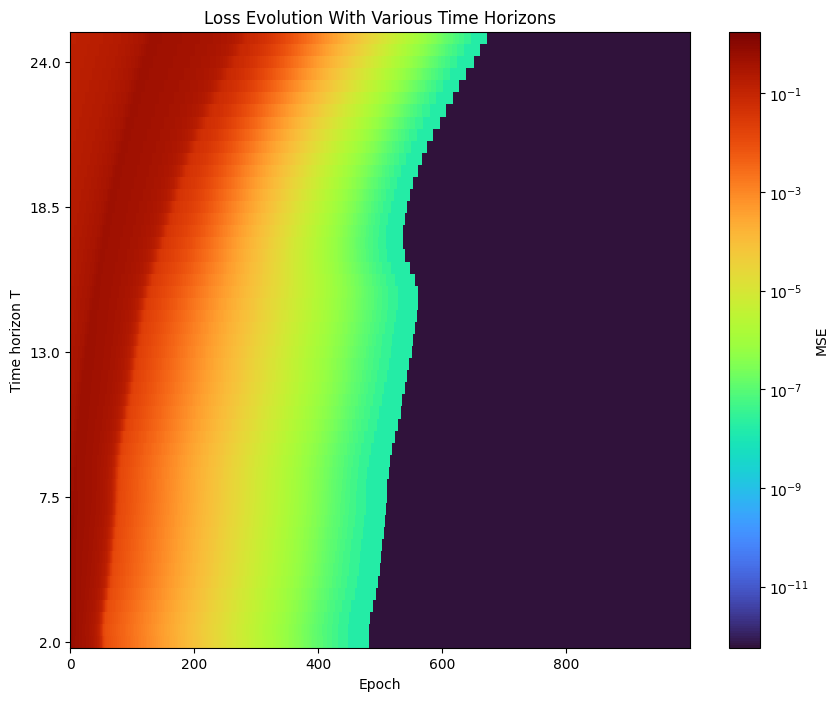

In [ ]:
#%%

## 2D imshow plot with the loss againts the epochs and time horizon T

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
losses_plot = losses[:,:1001]
pcm = ax.imshow(losses_plot, aspect='auto', cmap='turbo', interpolation='none', origin='lower', norm=mcolors.LogNorm(vmin=losses_plot.min(), vmax=losses_plot.max()))

## Add colorbar
cbar = fig.colorbar(pcm, ax=ax, label='MSE')

ax.set_xlabel('Epoch')
ax.set_ylabel('Time horizon T')
ax.set_title('Loss Evolution With Various Time Horizons')

## Set x ticks and labels to the epochs
# ax.set_xticks(np.arange(0, losses[0].shape[0]+1, 500))
# ax.set_xticklabels(epochs[::500])

## Set y ticks and labels to the time horizon
Ts_ticks = np.linspace(Ts.min(), Ts.max(), 5)
ax.set_yticks(np.arange(len(Ts))[::len(Ts)//4])
ax.set_yticklabels(Ts_ticks)

plt.savefig(f"{savefolder}loss_imshow.png", dpi=300, bbox_inches='tight')

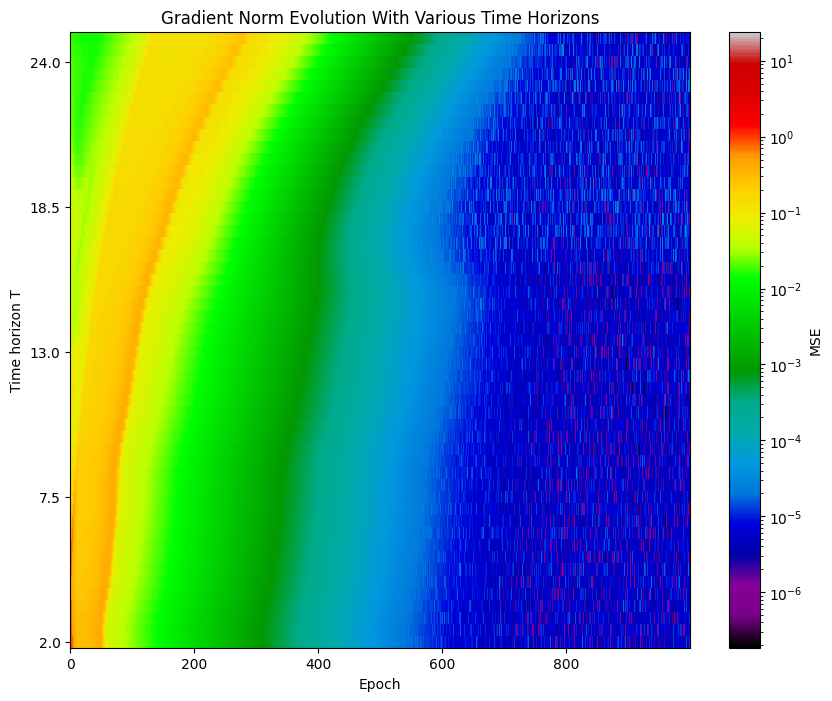

In [ ]:
#%%

## 2D imshow plot with the loss gradient norm the epochs and time horizon T

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
grad_norm_plot = grad_norms[:,:1001]

pcm = ax.imshow(grad_norm_plot, aspect='auto', cmap='nipy_spectral', interpolation='none', origin='lower', norm=mcolors.LogNorm(vmin=grad_norm_plot.min(), vmax=grad_norm_plot.max()))

## Add colorbar
cbar = fig.colorbar(pcm, ax=ax, label='MSE')

ax.set_xlabel('Epoch')
ax.set_ylabel('Time horizon T')
ax.set_title('Gradient Norm Evolution With Various Time Horizons')

## Set y ticks and labels to the time horizon
Ts_ticks = np.linspace(Ts.min(), Ts.max(), 5)
ax.set_yticks(np.arange(len(Ts))[::len(Ts)//4])
ax.set_yticklabels(Ts_ticks)

plt.savefig(f"{savefolder}loss_imshow_grads.png", dpi=300, bbox_inches='tight')